In [10]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [12]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
    'test': DataLoader(test_data,
                       batch_size = 100,
                       shuffle = True,
                       num_workers = 1),
                       
}


In [13]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1e718fcc7c0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1e719abfe80>}

In [14]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#create neural network module
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    #activation functions must be called manually in forward function
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))

        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training = self.training)
        x = self.fc2(x)

        return F.softmax(x)
    
        

In [15]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6}')

def test():
    model.eval()
    test_loss = 0
    correct=  0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n')

In [16]:
#start training
#10 epochs
for epoch in range(1, 11):
    train(epoch)
    test()
    

C:\Users\japee\AppData\Local\Temp\ipykernel_6276\3927722207.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.30301
Train Epoch: 1 [2000/60000 (3%)]	2.29338
Train Epoch: 1 [4000/60000 (7%)]	2.17451
Train Epoch: 1 [6000/60000 (10%)]	2.00963
Train Epoch: 1 [8000/60000 (13%)]	1.86589
Train Epoch: 1 [10000/60000 (17%)]	1.73653
Train Epoch: 1 [12000/60000 (20%)]	1.77302
Train Epoch: 1 [14000/60000 (23%)]	1.7201
Train Epoch: 1 [16000/60000 (27%)]	1.65664
Train Epoch: 1 [18000/60000 (30%)]	1.6879
Train Epoch: 1 [20000/60000 (33%)]	1.64893
Train Epoch: 1 [22000/60000 (37%)]	1.64376
Train Epoch: 1 [24000/60000 (40%)]	1.59058
Train Epoch: 1 [26000/60000 (43%)]	1.72603
Train Epoch: 1 [28000/60000 (47%)]	1.63557
Train Epoch: 1 [30000/60000 (50%)]	1.66561
Train Epoch: 1 [32000/60000 (53%)]	1.60971
Train Epoch: 1 [34000/60000 (57%)]	1.61674
Train Epoch: 1 [36000/60000 (60%)]	1.67849
Train Epoch: 1 [38000/60000 (63%)]	1.63458
Train Epoch: 1 [40000/60000 (67%)]	1.61577
Train Epoch: 1 [42000/60000 (70%)]	1.61621
Train Epoch: 1 [44000/60000 (73%)]	1.63313
Train Epoch: 1 [46000/60

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
tensor([[5.1051e-19, 1.3524e-26, 3.4606e-12, 7.1260e-17, 1.7655e-26, 3.4391e-21,
         5.9767e-26, 1.2594e-24, 1.0000e+00, 4.8021e-21]],
       grad_fn=<SoftmaxBackward0>)
Prediction: 8


C:\Users\japee\AppData\Local\Temp\ipykernel_6276\3927722207.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


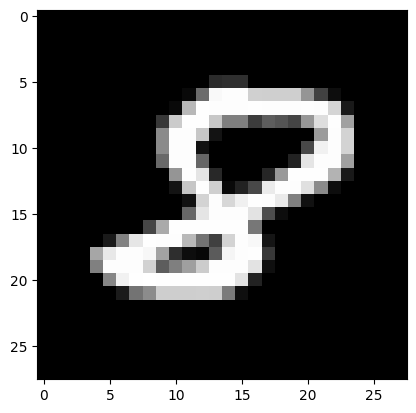

In [112]:
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor, Resize
from PIL import Image
import numpy as np

print(tensor_image.shape)

model.eval()
    
data, target = test_data[61]

print(data.shape)

data = data.unsqueeze(0).to(device)


output = model(data)
print(output)
prediction = output.argmax(dim = 1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
tensor([[0.4762, 0.0076, 0.1187, 0.2325, 0.0017, 0.0617, 0.0085, 0.0727, 0.0129,
         0.0076]], grad_fn=<SoftmaxBackward0>)
Prediction: 0


C:\Users\japee\AppData\Local\Temp\ipykernel_6276\3927722207.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


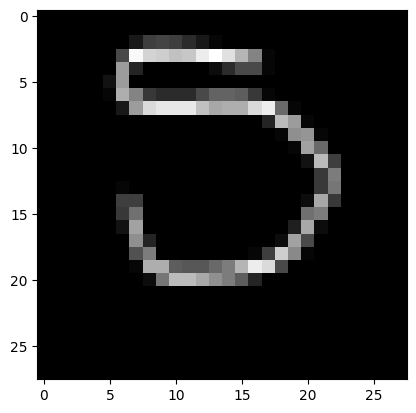

In [114]:
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor, Resize
from PIL import Image
import numpy as np

image_path = "five.png"
image = Image.open(image_path)
image = image.convert("L")

resize_transform = Resize((28, 28))
image = resize_transform(image)

transform = ToTensor()
tensor_image = transform(image)

inverted_tensor_image = 1 - tensor_image

print(tensor_image.shape)

model.eval()

print(data.shape)

data = inverted_tensor_image.unsqueeze(0).to(device)

output = model(data)
print(output)
prediction = output.argmax(dim = 1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()